## Customer Churn Prediction (Ecommerce )
> The data set belongs to a leading online E-Commerce company. An online retail (E commerce) company wants to know the customers who are going to churn, so accordingly they can approach customer to offer some promos.

In [1]:
## imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

data = pd.read_excel("E Commerce Dataset.xlsx",sheet_name='E Comm')

## Predictive Modeling

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [3]:
data.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,5630.0,52815.500000,1625.385339,50001.0,51408.25,52815.50,54222.7500,55630.00
Churn,5630.0,0.168384,0.374240,0.0,0.00,0.00,0.0000,1.00
Tenure,5366.0,10.189899,8.557241,0.0,2.00,9.00,16.0000,61.00
CityTier,5630.0,1.654707,0.915389,1.0,1.00,1.00,3.0000,3.00
WarehouseToHome,5379.0,15.639896,8.531475,5.0,9.00,14.00,20.0000,127.00
HourSpendOnApp,5375.0,2.931535,0.721926,0.0,2.00,3.00,3.0000,5.00
NumberOfDeviceRegistered,5630.0,3.688988,1.023999,1.0,3.00,4.00,4.0000,6.00
SatisfactionScore,5630.0,3.066785,1.380194,1.0,2.00,3.00,4.0000,5.00
NumberOfAddress,5630.0,4.214032,2.583586,1.0,2.00,3.00,6.0000,22.00
Complain,5630.0,0.284902,0.451408,0.0,0.00,0.00,1.0000,1.00


In [5]:
data.columns

Index(['CustomerID', 'Churn', 'Tenure', 'PreferredLoginDevice', 'CityTier',
       'WarehouseToHome', 'PreferredPaymentMode', 'Gender', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore',
       'MaritalStatus', 'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object')

### Identify variable and its type 

In [6]:
target_feat = "Churn"

In [7]:
all_features = data.columns.tolist()
all_features.remove(target_feat)
all_features.remove('CustomerID')
categorical_feat = [col for col in all_features if data[col].dtype == 'O'] + ['Complain']
ordinal_cat_feat = ['CityTier','HourSpendOnApp','NumberOfDeviceRegistered','SatisfactionScore']
numeric_feat = list(set(all_features).difference(set(categorical_feat).union(set(ordinal_cat_feat))))
print("Numerical Features\t: ", numeric_feat, "\n\n"
          "Categorical Features\t: " ,categorical_feat, "\n\n"
          "Ordinal Features\t: ",ordinal_cat_feat)

Numerical Features	:  ['NumberOfAddress', 'CashbackAmount', 'OrderAmountHikeFromlastYear', 'DaySinceLastOrder', 'Tenure', 'WarehouseToHome', 'OrderCount', 'CouponUsed'] 

Categorical Features	:  ['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender', 'PreferedOrderCat', 'MaritalStatus', 'Complain'] 

Ordinal Features	:  ['CityTier', 'HourSpendOnApp', 'NumberOfDeviceRegistered', 'SatisfactionScore']


## Univariate analysis

### Numerical Variables

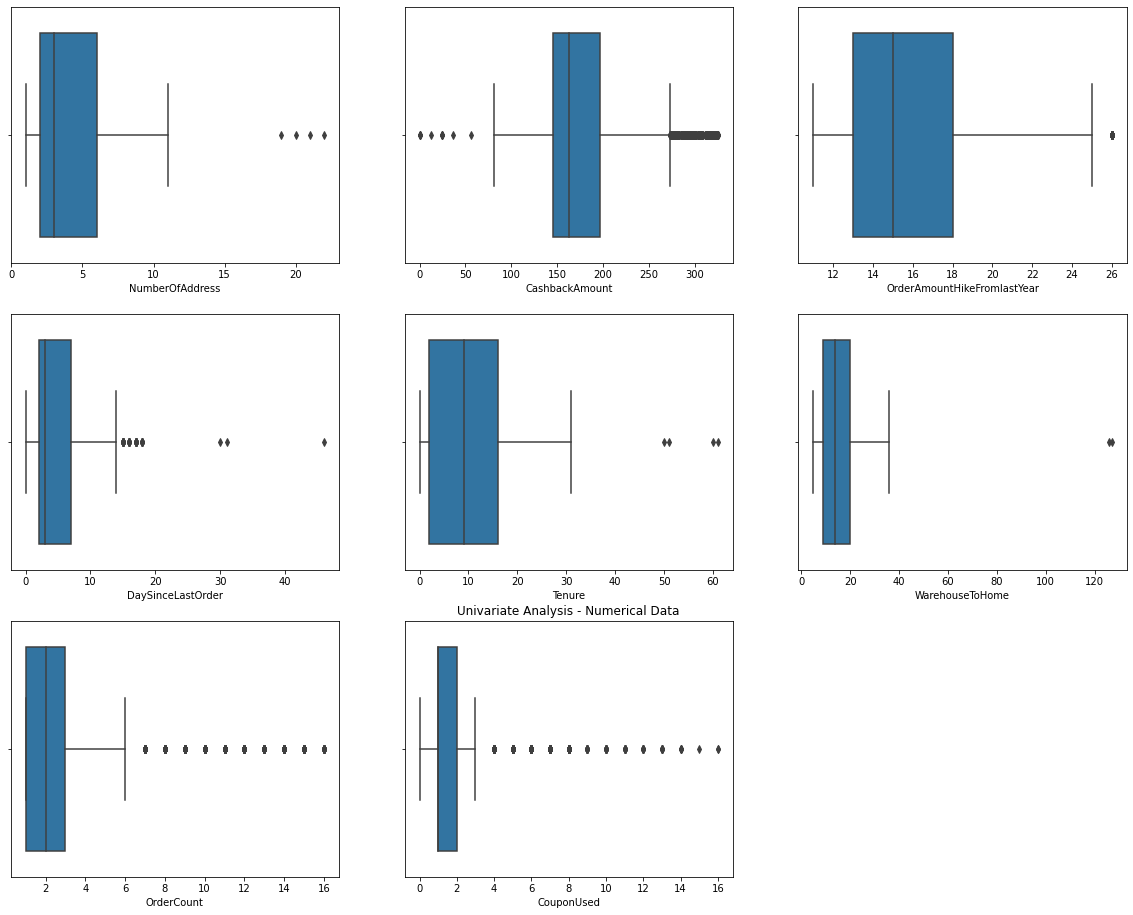

In [8]:
## numerical variables
def univariate_boxplot_numerical_features(data, numeric_feat):
    plt.figure(figsize=(20,16))
    for idx,feat in enumerate(numeric_feat):
        plt.subplot(3,3,idx+1)
        sns.boxplot(data[feat])
    plt.title("Univariate Analysis - Numerical Data")
univariate_boxplot_numerical_features(data, numeric_feat)

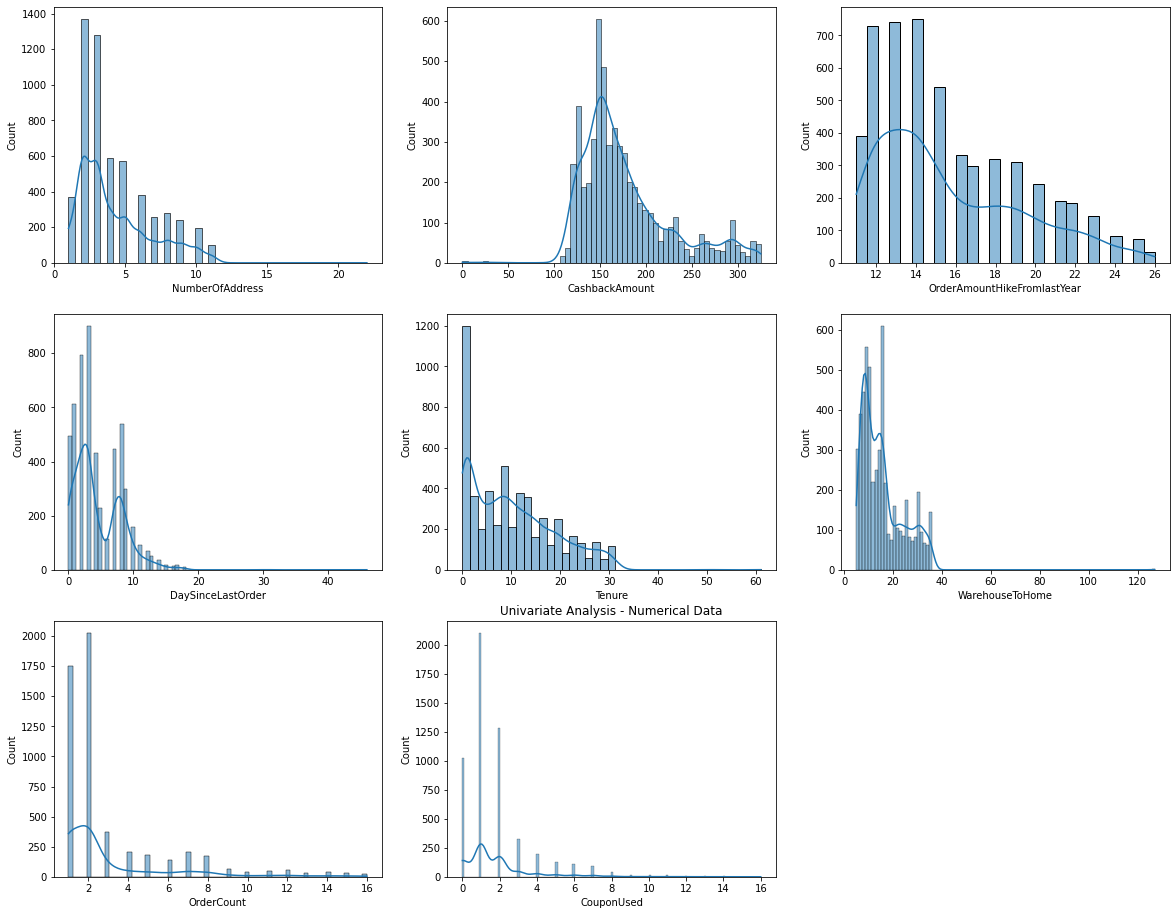

In [9]:
def univariate_numerical_features(data, numeric_feat):
    plt.figure(figsize=(20,16))
    for idx,feat in enumerate(numeric_feat):
        plt.subplot(3,3,idx+1)
        sns.histplot(data[feat], kde=True)
    plt.title("Univariate Analysis - Numerical Data")
univariate_numerical_features(data, numeric_feat)

### Ordinal Variables

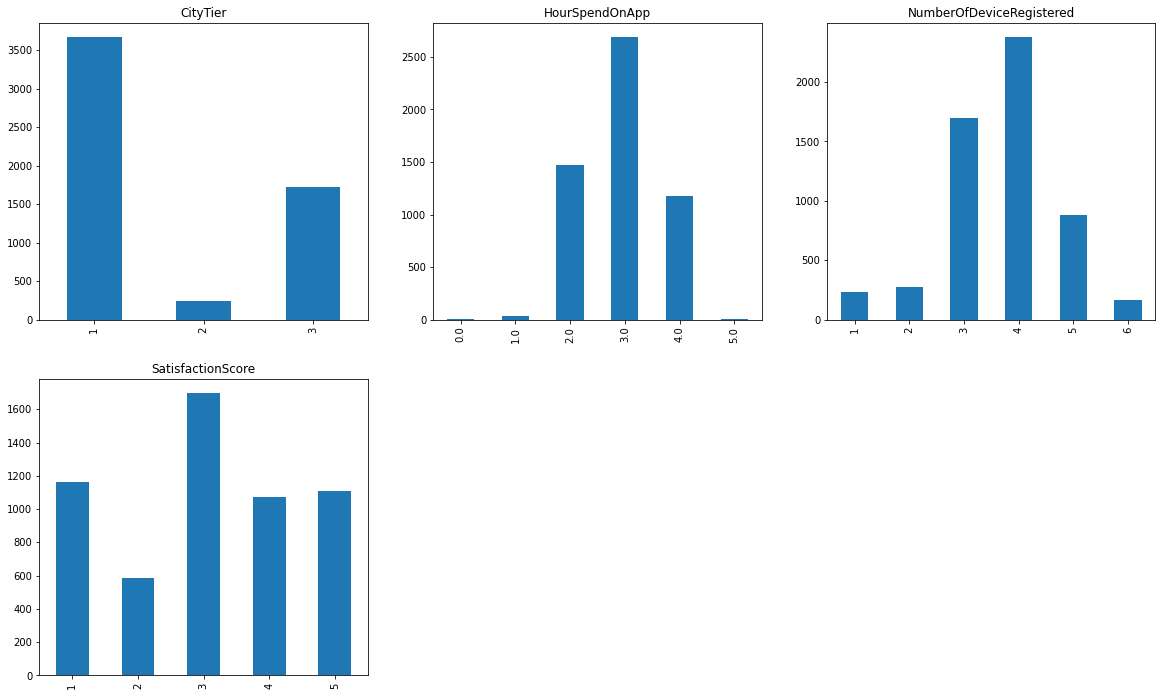

In [10]:
plt.figure(figsize=(20,12))
for idx,col in enumerate(ordinal_cat_feat):
    plt.subplot(2,3,idx+1)
    data[col].value_counts().plot(kind='bar')
    plt.title(col)
# plt.title("Univariate Analysis - Ordinal Data")

### Categorical Variables

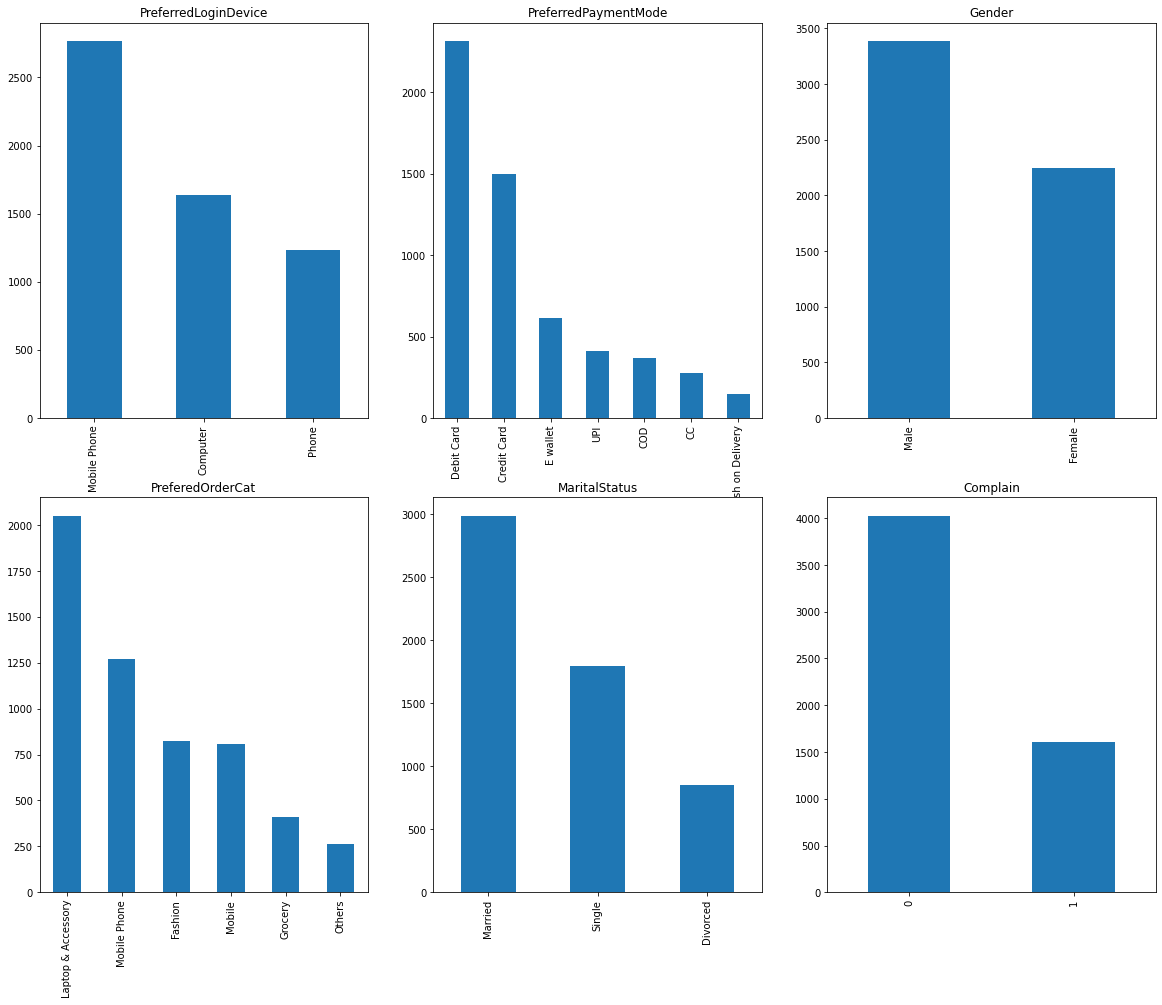

In [11]:
def univariate_categroical_features(data, categorical_feat):
    plt.figure(figsize=(20,16))
    for idx,col in enumerate(categorical_feat):
        plt.subplot(2,3,idx+1)
        data[col].value_counts().plot(kind='bar')
        plt.title(col)
univariate_categroical_features(data, categorical_feat)

## From above plot few features have different names for same categories - Ambiguity
* **'PreferredLoginDevice'** : 
> * 'Phone' and 'Mobile Phone' -> MobilePhone  

* **'PreferredPaymentMode'** :
> * Credit Card and CC -> CreditCard
> * COD and Cash on delivery -> CashOnDelivery

* **'PreferedOrderCat'** :
> * Mobile Phone and Mobile -> MobilePhone

In [12]:
cat_to_handel = {'PreferredLoginDevice':{"Mobile Phone":"MobilePhone","Phone":"MobilePhone"},
                 'PreferredPaymentMode':{"COD":"CashOnDelivery","Cash on Delivery":"CashOnDelivery",
                                        "CC":"CreditCard","Credit Card":"CreditCard"},
                 'PreferedOrderCat':{"Mobile Phone":"MobilePhone","Mobile":"MobilePhone"}}

## 
def conversion_ambiguty(demo, cat_to_handel):
    for col in cat_to_handel.keys():
        demo[col] = demo[col].replace(cat_to_handel[col])
    return demo

### Data split

In [13]:
N = len(data)
np.random.seed(42)
train_size = int(N * 0.70)
random_indexes = np.random.permutation(N)

train_indexes = random_indexes[:train_size]
test_indexes = random_indexes[train_size:]

print("Train Size\t:\t",len(train_indexes),"\nTest Size\t:\t", len(test_indexes))
## train set
train_set = data.iloc[train_indexes,:].copy()
train_set.reset_index(drop=True,inplace=True)
## test set
test_set = data.iloc[test_indexes,:].copy()
test_set.reset_index(drop=True,inplace=True)

Train Size	:	 3940 
Test Size	:	 1690


In [14]:
train_set.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,54332,1,1.0,Computer,3,7.0,COD,Female,4.0,6,Mobile Phone,5,Single,2,0,22.0,2.0,2.0,1.0,148.25
1,51989,0,15.0,Mobile Phone,1,9.0,Debit Card,Female,3.0,1,Laptop & Accessory,1,Married,3,1,13.0,1.0,1.0,3.0,152.31
2,53444,0,13.0,Computer,1,29.0,Credit Card,Female,3.0,4,Fashion,5,Single,3,1,14.0,2.0,NaN,9.0,233.80
3,54560,0,5.0,Phone,1,7.0,Debit Card,Male,4.0,5,Mobile Phone,5,Married,3,0,13.0,4.0,4.0,3.0,147.18
4,54899,0,13.0,Mobile Phone,1,7.0,Debit Card,Female,4.0,5,Grocery,1,Married,3,0,17.0,10.0,NaN,9.0,252.42


Train Set


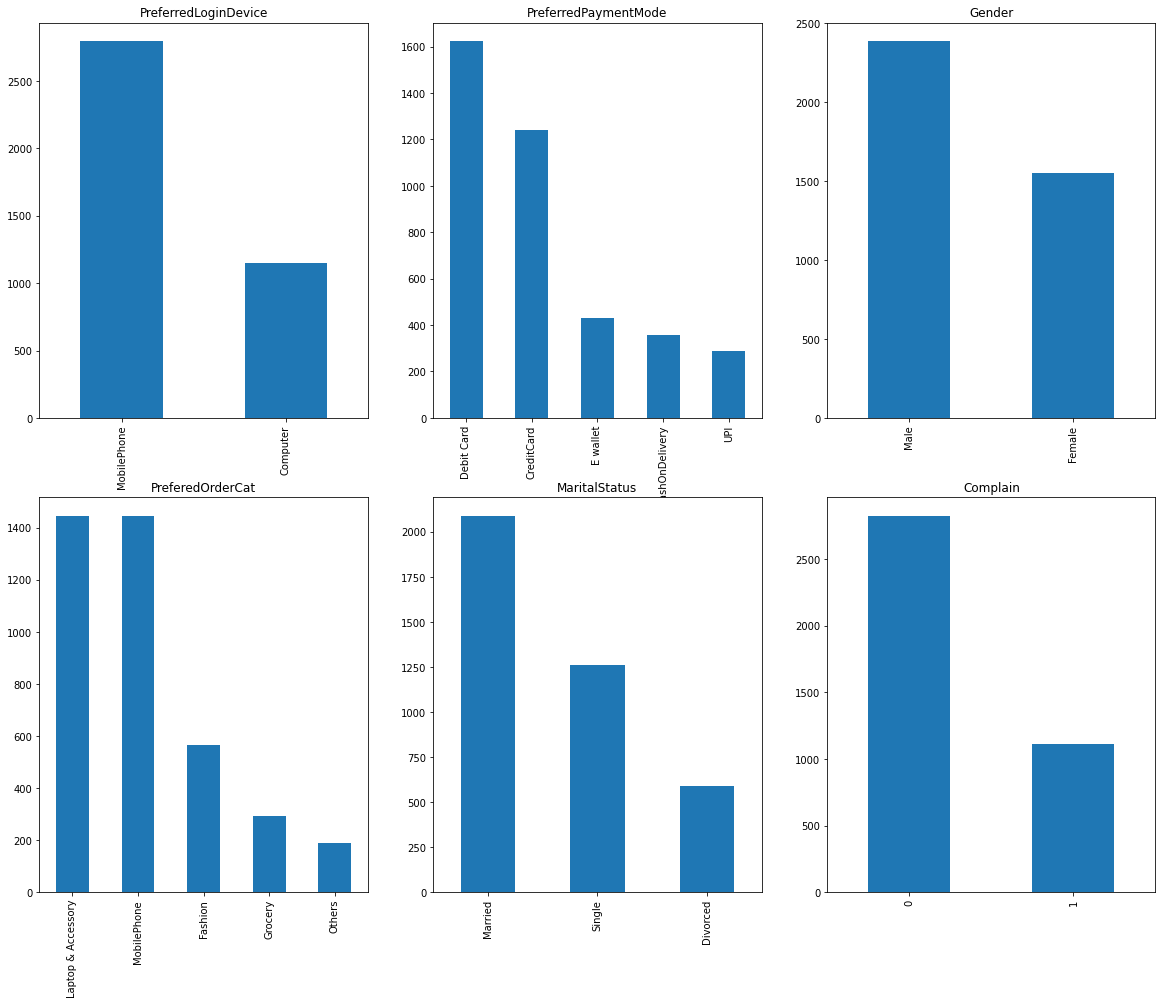

In [15]:
## removing ambiguty in train and test data
train_set = conversion_ambiguty(train_set, cat_to_handel)

test_set = conversion_ambiguty(test_set, cat_to_handel)


print("Train Set")
univariate_categroical_features(train_set, categorical_feat)

## Handling Missing Values

In [16]:
def identify_missing_columns(data):
    missing_feat_train = data.isna().sum()[data.isna().sum() > 0].index
    numerical_missing_train = []
    cat_missing_train = []
    ordinal_missing_train = []
    for col in missing_feat_train:
        if col in numeric_feat:
            numerical_missing_train.append(col)
        elif col in categorical_feat:
            cat_missing_train.append(col)
        elif col in ordinal_cat_feat:
            ordinal_missing_train.append(col)
    return numerical_missing_train, cat_missing_train, ordinal_missing_train


numerical_missing_train, cat_missing_train, ordinal_missing_train = identify_missing_columns(train_set)

numerical_missing_test, cat_missing_test, ordinal_missing_test = identify_missing_columns(test_set)

In [17]:
print("## Train Data:\n", numerical_missing_train, cat_missing_train, ordinal_missing_train)

print("## Test Data:\n",numerical_missing_test, cat_missing_test, ordinal_missing_test)

## Train Data:
 ['Tenure', 'WarehouseToHome', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder'] [] ['HourSpendOnApp']
## Test Data:
 ['Tenure', 'WarehouseToHome', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder'] [] ['HourSpendOnApp']


### Numerical Features
* 'Tenure',
* 'WarehouseToHome',
*  'OrderAmountHikeFromlastYear',
*  'CouponUsed',
*  'OrderCount',
*  'DaySinceLastOrder'

### Ordinal Features
* 'HourSpendOnApp'

In [18]:
from sklearn.impute import SimpleImputer
median_imp = SimpleImputer(missing_values=np.nan, strategy='median')
mode_imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

median_imp = median_imp.fit(train_set.loc[:,numerical_missing_train].values)
mode_imp = mode_imp.fit(train_set.loc[:,ordinal_missing_train].values)
# train_set.iloc[:,numerical_missing_train] = 

train_set.loc[:,numerical_missing_train] = median_imp.transform(train_set.loc[:,numerical_missing_train])
train_set.loc[:,ordinal_missing_train] = mode_imp.transform(train_set.loc[:,ordinal_missing_train])

test_set.loc[:,numerical_missing_test] = median_imp.transform(test_set.loc[:,numerical_missing_test])
test_set.loc[:,ordinal_missing_test] = mode_imp.transform(test_set.loc[:,ordinal_missing_test])


In [19]:
train_set.isna().sum()

CustomerID                     0
Churn                          0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
dtype: int64

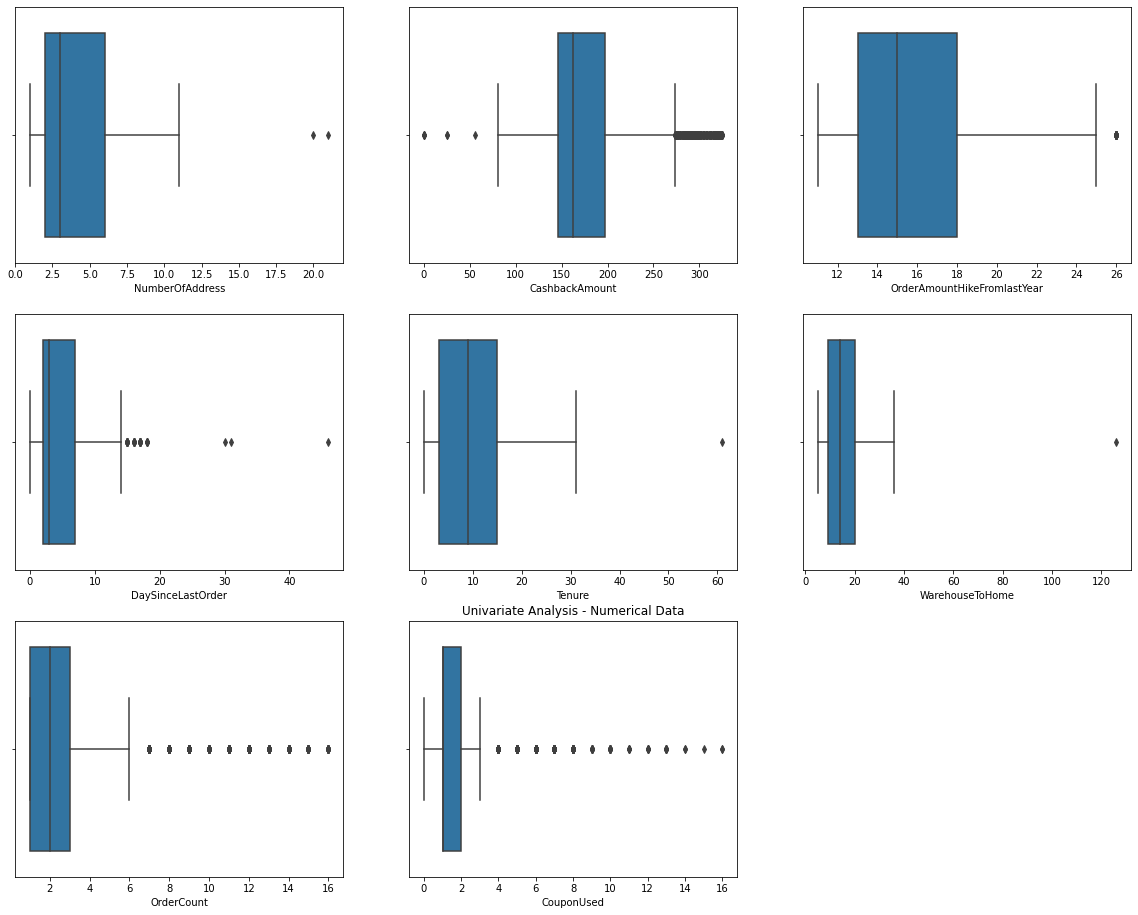

In [20]:
## before applying log transformation
univariate_boxplot_numerical_features(train_set[numeric_feat], numeric_feat)

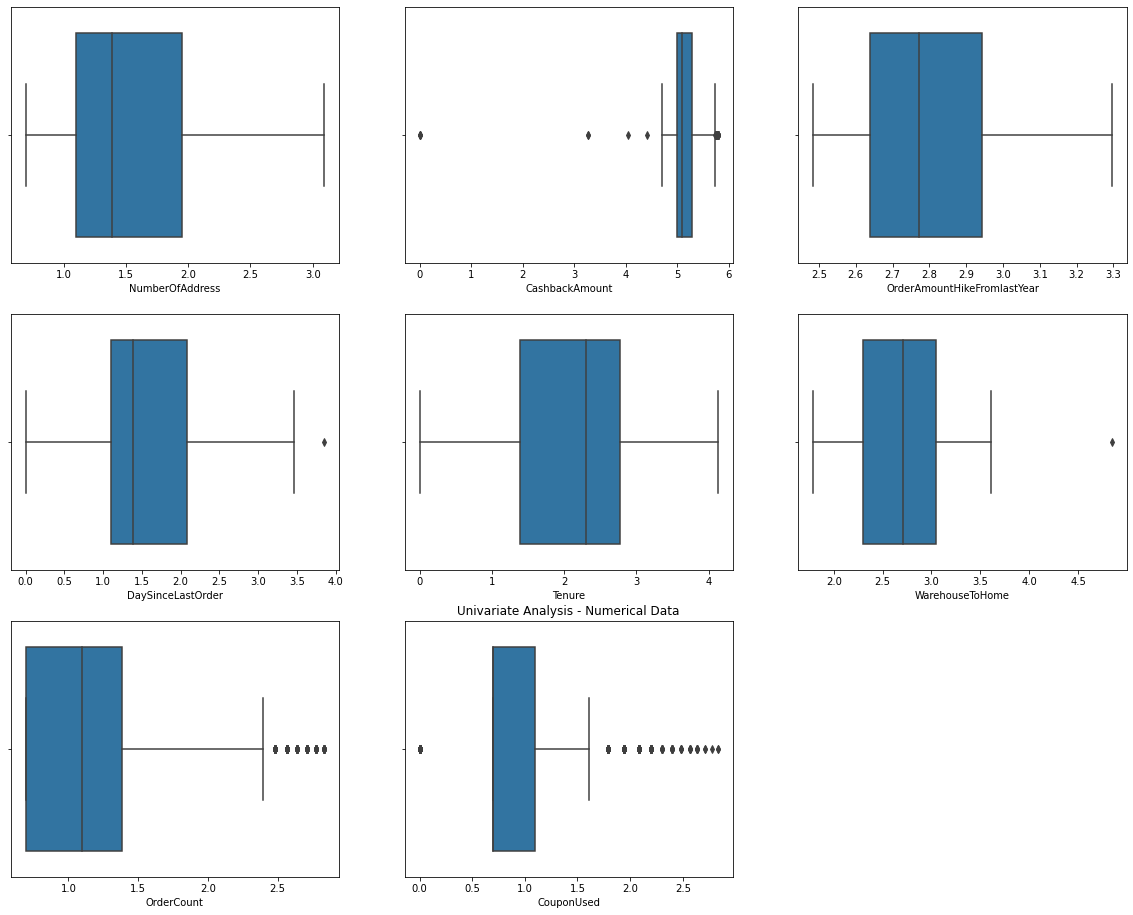

In [21]:
## Removing outliers using log tranformation
univariate_boxplot_numerical_features(np.log1p(train_set[numeric_feat]), numeric_feat)

In [22]:
train_set.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,54332,1,1.0,Computer,3,7.0,CashOnDelivery,Female,4.0,6,MobilePhone,5,Single,2,0,22.0,2.0,2.0,1.0,148.25
1,51989,0,15.0,MobilePhone,1,9.0,Debit Card,Female,3.0,1,Laptop & Accessory,1,Married,3,1,13.0,1.0,1.0,3.0,152.31
2,53444,0,13.0,Computer,1,29.0,CreditCard,Female,3.0,4,Fashion,5,Single,3,1,14.0,2.0,2.0,9.0,233.80
3,54560,0,5.0,MobilePhone,1,7.0,Debit Card,Male,4.0,5,MobilePhone,5,Married,3,0,13.0,4.0,4.0,3.0,147.18
4,54899,0,13.0,MobilePhone,1,7.0,Debit Card,Female,4.0,5,Grocery,1,Married,3,0,17.0,10.0,2.0,9.0,252.42


In [23]:
train_set.Churn.value_counts()

0    3284
1     656
Name: Churn, dtype: int64

In [24]:
test_set.Churn.value_counts()

0    1398
1     292
Name: Churn, dtype: int64

## Bivariate Analysis

[]

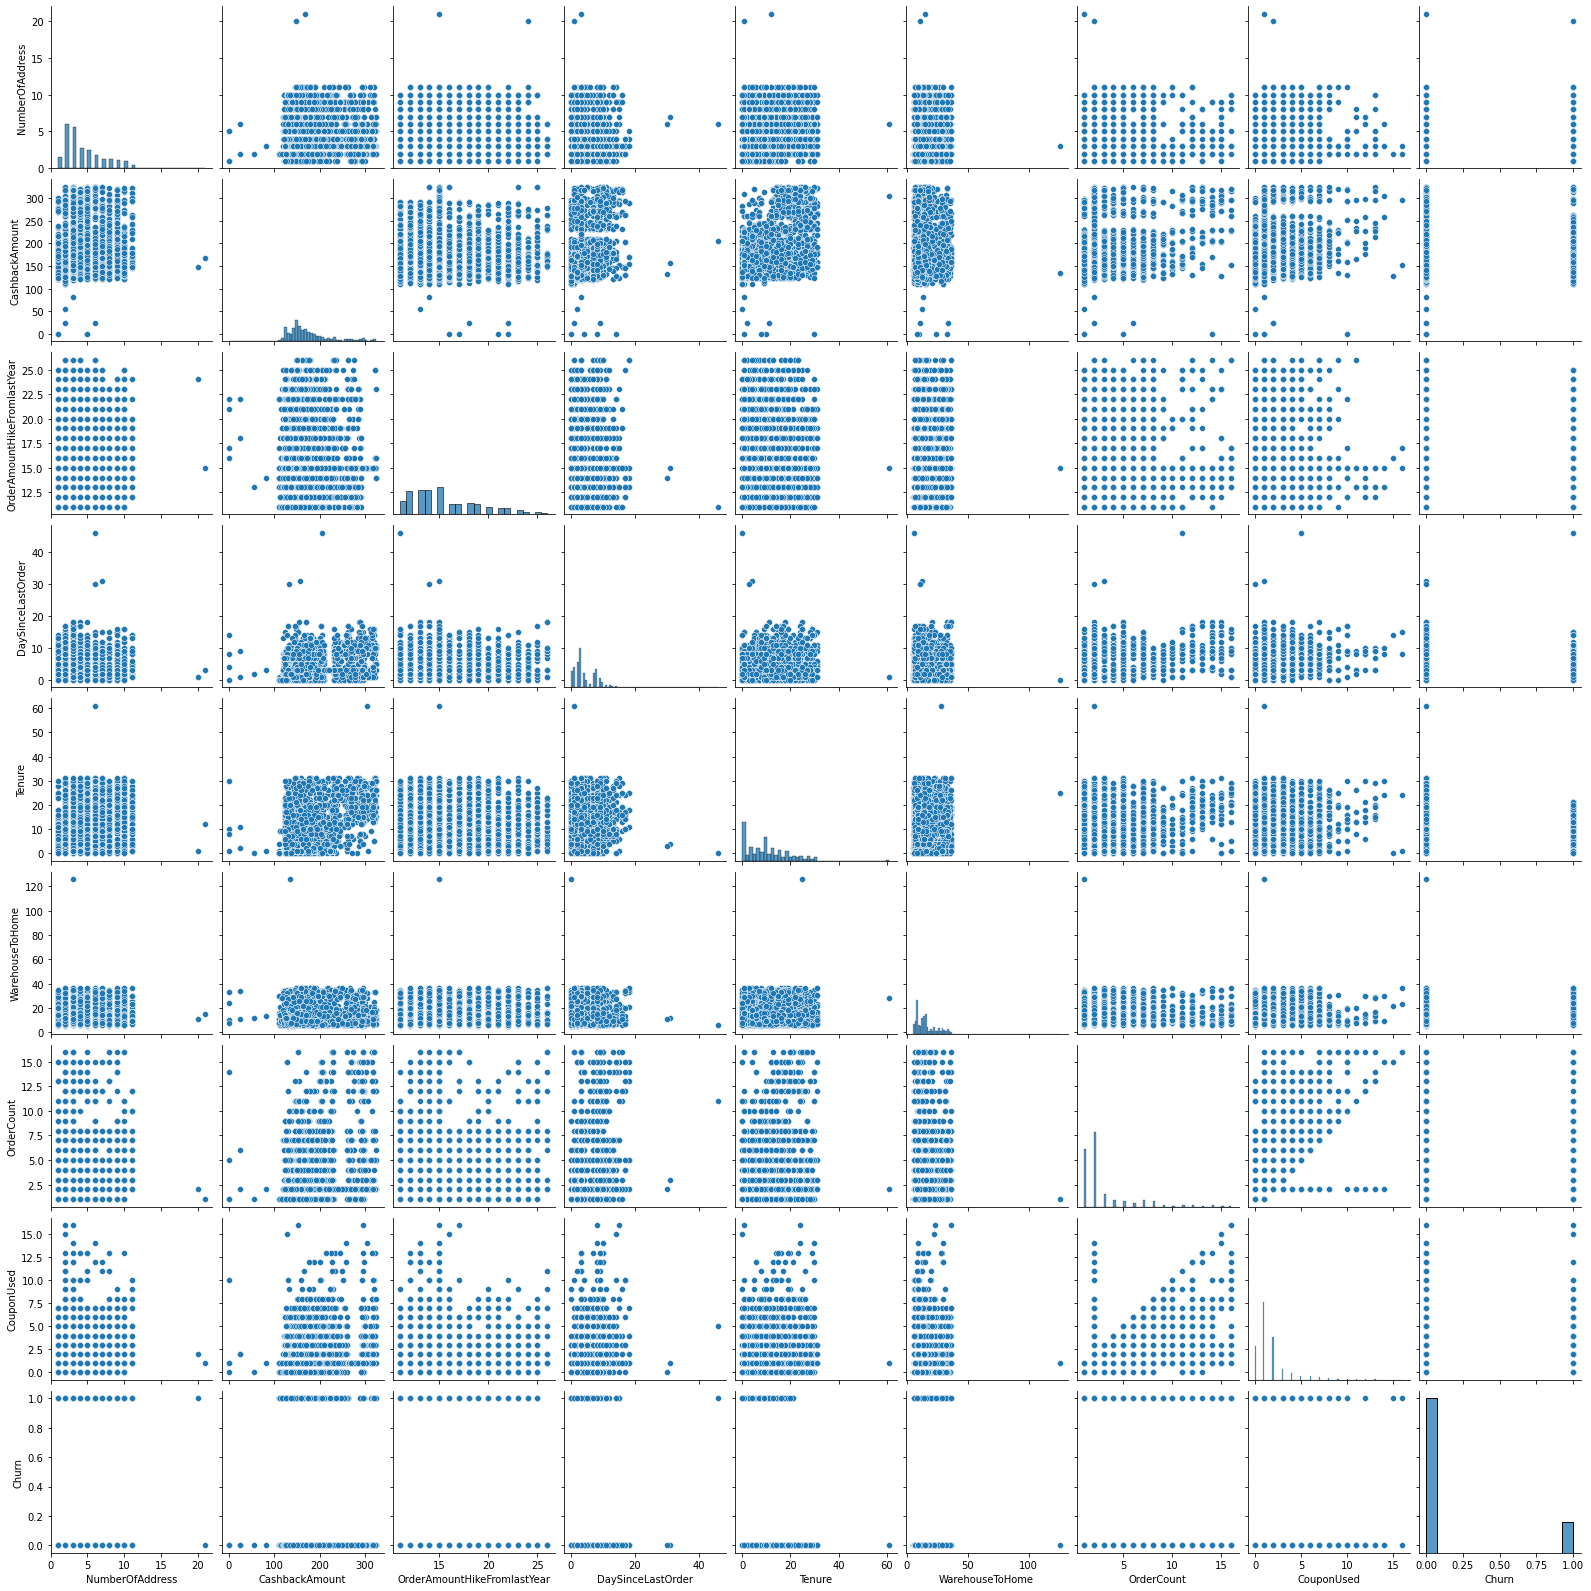

In [25]:
sns.pairplot(train_set[numeric_feat + [target_feat]])
plt.plot()

In [26]:
data[numeric_feat+[target_feat]].corr()

,NumberOfAddress,CashbackAmount,OrderAmountHikeFromlastYear,DaySinceLastOrder,Tenure,WarehouseToHome,OrderCount,CouponUsed,Churn
NumberOfAddress,1.000000,0.186688,0.015533,-0.064847,0.237666,-0.011020,-0.007609,0.042120,0.043931
CashbackAmount,0.186688,1.000000,0.017869,0.347172,0.476380,-0.009200,0.360984,0.286728,-0.154118
OrderAmountHikeFromlastYear,0.015533,0.017869,1.000000,0.006003,0.005825,0.038795,0.023101,0.033201,-0.010058
DaySinceLastOrder,-0.064847,0.347172,0.006003,1.000000,0.184552,0.017829,0.497928,0.358930,-0.160757
Tenure,0.237666,0.476380,0.005825,0.184552,1.000000,-0.018218,0.186403,0.129035,-0.349408
WarehouseToHome,-0.011020,-0.009200,0.038795,0.017829,-0.018218,1.000000,0.002681,-0.003935,0.076630
OrderCount,-0.007609,0.360984,0.023101,0.497928,0.186403,0.002681,1.000000,0.745245,-0.028697
CouponUsed,0.042120,0.286728,0.033201,0.358930,0.129035,-0.003935,0.745245,1.000000,-0.008264
Churn,0.043931,-0.154118,-0.010058,-0.160757,-0.349408,0.076630,-0.028697,-0.008264,1.000000


In [27]:
train_set.drop('CustomerID',axis=1,inplace=True)
test_set.drop('CustomerID',axis=1,inplace=True)

In [28]:
categorical_feat

['PreferredLoginDevice',
 'PreferredPaymentMode',
 'Gender',
 'PreferedOrderCat',
 'MaritalStatus',
 'Complain']

In [29]:
ohe_train = pd.get_dummies(train_set, columns=categorical_feat[:-1], drop_first=True)

In [30]:
ohe_test = pd.get_dummies(test_set, columns=categorical_feat[:-1], drop_first=True)
ohe_test.head()

,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,PreferredLoginDevice_MobilePhone,PreferredPaymentMode_CreditCard,PreferredPaymentMode_Debit Card,PreferredPaymentMode_E wallet,PreferredPaymentMode_UPI,Gender_Male,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_MobilePhone,PreferedOrderCat_Others,MaritalStatus_Married,MaritalStatus_Single
0,0,9.0,2,6.0,2.0,3,3,1,0,21.0,0.0,1.0,3.0,120.64,1,0,1,0,0,1,0,0,1,0,1,0
1,0,1.0,1,8.0,4.0,4,3,2,0,13.0,2.0,2.0,3.0,158.75,1,0,1,0,0,1,0,0,1,0,0,1
2,0,4.0,3,23.0,4.0,4,3,10,0,16.0,2.0,3.0,3.0,178.01,1,0,1,0,0,1,0,1,0,0,1,0
3,0,1.0,3,15.0,3.0,2,4,2,0,23.0,2.0,2.0,3.0,173.51,1,0,1,0,0,1,0,1,0,0,1,0
4,0,18.0,3,26.0,2.0,3,3,9,0,15.0,0.0,1.0,1.0,148.50,1,0,1,0,0,0,0,1,0,0,0,1


# Model Building

## Before Scaling Data

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from xgboost import XGBClassifier

from sklearn.metrics import classification_report, confusion_matrix

In [32]:
x,y = ohe_train.drop('Churn',axis=1), ohe_train.Churn
x_test, y_test = ohe_test.drop('Churn' ,axis=1), ohe_test.Churn

In [33]:
## Logistic Regresiion
lr_classifier = LogisticRegression(random_state=0)
lr_classifier.fit(x,y)
y_pred = lr_classifier.predict(x_test)
print("## Logistic Regression : \nTrain: \n",classification_report(y, lr_classifier.predict(x)),
      "\nTest: \n",classification_report(y_test, y_pred),
      "\n## Confuson Matrix\nTrain:\n", confusion_matrix(y, lr_classifier.predict(x)),
      "\nTest:\n",confusion_matrix(y_test, y_pred)
      )

## Logistic Regression : 
Train: 
               precision    recall  f1-score   support

           0       0.90      0.97      0.93      3284
           1       0.75      0.49      0.59       656

    accuracy                           0.89      3940
   macro avg       0.83      0.73      0.76      3940
weighted avg       0.88      0.89      0.88      3940
 
Test: 
               precision    recall  f1-score   support

           0       0.90      0.97      0.93      1398
           1       0.77      0.49      0.60       292

    accuracy                           0.89      1690
   macro avg       0.84      0.73      0.77      1690
weighted avg       0.88      0.89      0.88      1690
 
## Confuson Matrix
Train:
 [[3176  108]
 [ 337  319]] 
Test:
 [[1355   43]
 [ 148  144]]


In [34]:
## LDA
classifier = LinearDiscriminantAnalysis()
classifier.fit(x,y)
y_pred = classifier.predict(x_test)
print("## LinearDiscriminantAnalysis : \nTrain: \n",classification_report(y, classifier.predict(x)),
      "\nTest: \n",classification_report(y_test, y_pred),
      "\n############Confuson Matrix\nTrain:\n", confusion_matrix(y, classifier.predict(x)),
      "\nTest:\n",confusion_matrix(y_test, y_pred)
      )

## LinearDiscriminantAnalysis : 
Train: 
               precision    recall  f1-score   support

           0       0.90      0.97      0.94      3284
           1       0.76      0.47      0.58       656

    accuracy                           0.89      3940
   macro avg       0.83      0.72      0.76      3940
weighted avg       0.88      0.89      0.88      3940
 
Test: 
               precision    recall  f1-score   support

           0       0.91      0.96      0.93      1398
           1       0.74      0.52      0.61       292

    accuracy                           0.89      1690
   macro avg       0.82      0.74      0.77      1690
weighted avg       0.88      0.89      0.88      1690
 
############Confuson Matrix
Train:
 [[3188   96]
 [ 346  310]] 
Test:
 [[1346   52]
 [ 141  151]]


In [35]:
## Decision Tree
classifier = DecisionTreeClassifier(min_samples_leaf=3,max_features=0.5,random_state=42)
classifier.fit(x,y)
y_pred = classifier.predict(x_test)
print("## DecisionTreeClassifier : \nTrain: \n",classification_report(y, classifier.predict(x)),
      "\nTest: \n",classification_report(y_test, y_pred),
      "\n############Confuson Matrix\nTrain:\n", confusion_matrix(y, classifier.predict(x)),
      "\nTest:\n",confusion_matrix(y_test, y_pred)
      )

## DecisionTreeClassifier : 
Train: 
               precision    recall  f1-score   support

           0       0.98      0.99      0.98      3284
           1       0.95      0.88      0.91       656

    accuracy                           0.97      3940
   macro avg       0.96      0.93      0.95      3940
weighted avg       0.97      0.97      0.97      3940
 
Test: 
               precision    recall  f1-score   support

           0       0.94      0.96      0.95      1398
           1       0.81      0.70      0.75       292

    accuracy                           0.92      1690
   macro avg       0.87      0.83      0.85      1690
weighted avg       0.92      0.92      0.92      1690
 
############Confuson Matrix
Train:
 [[3253   31]
 [  80  576]] 
Test:
 [[1349   49]
 [  87  205]]


In [36]:
## RandomForest
classifier = RandomForestClassifier(min_samples_leaf=3,max_features=0.5,random_state=42)
classifier.fit(x,y)
y_pred = classifier.predict(x_test)
print("## RandomForest : \nTrain: \n",classification_report(y, classifier.predict(x)),
      "\nTest: \n",classification_report(y_test, y_pred),
      "\n############Confuson Matrix\nTrain:\n", confusion_matrix(y, classifier.predict(x)),
      "\nTest:\n",confusion_matrix(y_test, y_pred)
      )

## RandomForest : 
Train: 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      3284
           1       0.99      0.93      0.96       656

    accuracy                           0.99      3940
   macro avg       0.99      0.97      0.98      3940
weighted avg       0.99      0.99      0.99      3940
 
Test: 
               precision    recall  f1-score   support

           0       0.95      0.99      0.97      1398
           1       0.92      0.75      0.83       292

    accuracy                           0.95      1690
   macro avg       0.94      0.87      0.90      1690
weighted avg       0.95      0.95      0.94      1690
 
############Confuson Matrix
Train:
 [[3279    5]
 [  43  613]] 
Test:
 [[1380   18]
 [  72  220]]


In [37]:
classifier = XGBClassifier()
classifier.fit(x,y)
y_pred = classifier.predict(x_test)
print("## XGBClassifier : \nTrain: \n",classification_report(y, classifier.predict(x)),
      "\nTest: \n",classification_report(y_test, y_pred),
      "\n############Confuson Matrix\nTrain:\n", confusion_matrix(y, classifier.predict(x)),
      "\nTest:\n",confusion_matrix(y_test, y_pred)
      )

[00:38:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
## XGBClassifier : 
Train: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3284
           1       1.00      1.00      1.00       656

    accuracy                           1.00      3940
   macro avg       1.00      1.00      1.00      3940
weighted avg       1.00      1.00      1.00      3940
 
Test: 
               precision    recall  f1-score   support

           0       0.97      0.99      0.98      1398
           1       0.95      0.85      0.90       292

    accuracy                           0.97      1690
   macro avg       0.96      0.92      0.94      1690
weighted avg       0.97      0.97      0.97      1690

### With Scaling

In [38]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x,y = ohe_train.drop('Churn',axis=1), ohe_train.Churn
sc = sc.fit(x.values)
x.iloc[:,:] = sc.transform(x)
x_test, y_test = ohe_test.drop('Churn' ,axis=1), ohe_test.Churn
x_test.iloc[:,:] = sc.transform(x_test)

In [39]:
## Logistic Regresiion
lr_classifier = LogisticRegression(random_state=42)
lr_classifier.fit(x,y)
y_pred = lr_classifier.predict(x_test)
print("## Logistic Regression : \nTrain: \n",classification_report(y, lr_classifier.predict(x)),
      "\nTest: \n",classification_report(y_test, y_pred),
      "\n## Confuson Matrix\nTrain:\n", confusion_matrix(y, lr_classifier.predict(x)),
      "\nTest:\n",confusion_matrix(y_test, y_pred)
      )

## Logistic Regression : 
Train: 
               precision    recall  f1-score   support

           0       0.91      0.97      0.94      3284
           1       0.79      0.52      0.63       656

    accuracy                           0.90      3940
   macro avg       0.85      0.74      0.78      3940
weighted avg       0.89      0.90      0.89      3940
 
Test: 
               precision    recall  f1-score   support

           0       0.91      0.97      0.94      1398
           1       0.78      0.53      0.63       292

    accuracy                           0.89      1690
   macro avg       0.84      0.75      0.78      1690
weighted avg       0.89      0.89      0.88      1690
 
## Confuson Matrix
Train:
 [[3196   88]
 [ 317  339]] 
Test:
 [[1354   44]
 [ 137  155]]


In [40]:
## LDA
classifier = LinearDiscriminantAnalysis()
classifier.fit(x,y)
y_pred = classifier.predict(x_test)
print("## LinearDiscriminantAnalysis : \nTrain: \n",classification_report(y, classifier.predict(x)),
      "\nTest: \n",classification_report(y_test, y_pred),
      "\n############Confuson Matrix\nTrain:\n", confusion_matrix(y, classifier.predict(x)),
      "\nTest:\n",confusion_matrix(y_test, y_pred)
      )



## LinearDiscriminantAnalysis : 
Train: 
               precision    recall  f1-score   support

           0       0.90      0.97      0.94      3284
           1       0.76      0.47      0.58       656

    accuracy                           0.89      3940
   macro avg       0.83      0.72      0.76      3940
weighted avg       0.88      0.89      0.88      3940
 
Test: 
               precision    recall  f1-score   support

           0       0.91      0.96      0.93      1398
           1       0.74      0.52      0.61       292

    accuracy                           0.89      1690
   macro avg       0.82      0.74      0.77      1690
weighted avg       0.88      0.89      0.88      1690
 
############Confuson Matrix
Train:
 [[3188   96]
 [ 346  310]] 
Test:
 [[1346   52]
 [ 141  151]]


In [41]:
## Decision Tree
classifier = DecisionTreeClassifier(min_samples_leaf=3,max_features=0.5,random_state=42)
classifier.fit(x,y)
y_pred = classifier.predict(x_test)
print("## DecisionTreeClassifier : \nTrain: \n",classification_report(y, classifier.predict(x)),
      "\nTest: \n",classification_report(y_test, y_pred),
      "\n############Confuson Matrix\nTrain:\n", confusion_matrix(y, classifier.predict(x)),
      "\nTest:\n",confusion_matrix(y_test, y_pred)
      )

## DecisionTreeClassifier : 
Train: 
               precision    recall  f1-score   support

           0       0.98      0.99      0.98      3284
           1       0.95      0.88      0.91       656

    accuracy                           0.97      3940
   macro avg       0.96      0.93      0.95      3940
weighted avg       0.97      0.97      0.97      3940
 
Test: 
               precision    recall  f1-score   support

           0       0.94      0.96      0.95      1398
           1       0.81      0.71      0.76       292

    accuracy                           0.92      1690
   macro avg       0.87      0.84      0.85      1690
weighted avg       0.92      0.92      0.92      1690
 
############Confuson Matrix
Train:
 [[3253   31]
 [  80  576]] 
Test:
 [[1349   49]
 [  85  207]]


In [42]:
## RandomForest
classifier = RandomForestClassifier(min_samples_leaf=3,max_features=0.5,random_state=42)
classifier.fit(x,y)
y_pred = classifier.predict(x_test)
print("## RandomForest : \nTrain: \n",classification_report(y, classifier.predict(x)),
      "\nTest: \n",classification_report(y_test, y_pred),
      "\n############Confuson Matrix\nTrain:\n", confusion_matrix(y, classifier.predict(x)),
      "\nTest:\n",confusion_matrix(y_test, y_pred)
      )


## RandomForest : 
Train: 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      3284
           1       0.99      0.93      0.96       656

    accuracy                           0.99      3940
   macro avg       0.99      0.97      0.98      3940
weighted avg       0.99      0.99      0.99      3940
 
Test: 
               precision    recall  f1-score   support

           0       0.95      0.99      0.97      1398
           1       0.92      0.75      0.83       292

    accuracy                           0.95      1690
   macro avg       0.94      0.87      0.90      1690
weighted avg       0.95      0.95      0.94      1690
 
############Confuson Matrix
Train:
 [[3279    5]
 [  43  613]] 
Test:
 [[1380   18]
 [  72  220]]


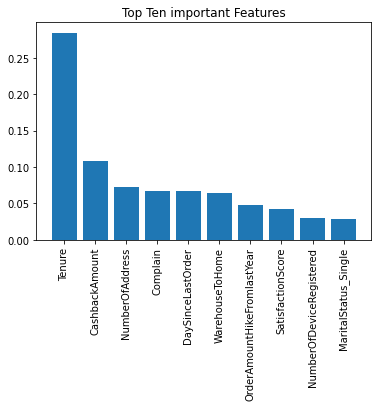

In [43]:
feature_imp = pd.DataFrame(np.array([x.columns.tolist() , classifier.feature_importances_]).T,columns=['features','importance'])
feature_imp.importance = feature_imp.importance.astype('float')
sorted_feat = feature_imp.sort_values(by='importance', ascending=False)
plt.bar(sorted_feat.features[:10], sorted_feat.importance[:10])
# plt.xlabel(sorted_feat.features[:10],rotation=45)
plt.xticks(rotation=90)
plt.title("Top Ten important Features")
plt.show()

In [44]:
classifier = XGBClassifier()
classifier.fit(x,y)
y_pred = classifier.predict(x_test)
print("## XGBClassifier : \nTrain: \n",classification_report(y, classifier.predict(x)),
      "\nTest: \n",classification_report(y_test, y_pred),
      "\n############Confuson Matrix\nTrain:\n", confusion_matrix(y, classifier.predict(x)),
      "\nTest:\n",confusion_matrix(y_test, y_pred)
      )

[00:38:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
## XGBClassifier : 
Train: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3284
           1       1.00      1.00      1.00       656

    accuracy                           1.00      3940
   macro avg       1.00      1.00      1.00      3940
weighted avg       1.00      1.00      1.00      3940
 
Test: 
               precision    recall  f1-score   support

           0       0.97      0.99      0.98      1398
           1       0.95      0.85      0.90       292

    accuracy                           0.97      1690
   macro avg       0.96      0.92      0.94      1690
weighted avg       0.97      0.97      0.97      1690

# Conclusion

* Considering the model's Recall and Precision compared against Train and Test dataset for Churn(1). We can use the following models for identifying customer who are going to churn

> **Model**
    > * Random Forest
    > * Decision Tree
    > * XGboost
